<a href="https://colab.research.google.com/github/vinayak654321/Air-bin-hotel-Analytics-VOIC-INTRENSHIP/blob/main/Air_bin_hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from google.colab import files
uploaded = files.upload()


Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data (1).xlsx


In [2]:
import pandas as pd

# Automatically get the uploaded filename
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# Check first few rows
df.head()


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [7]:
# Basic info about dataset
df.info()

# Check missing values
df.isnull().sum().sort_values(ascending=False).head(20)

# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Clean column names
df.columns = [c.strip() for c in df.columns]

# Convert common numeric columns to numeric format
for c in ['price','service fee','review rate number','availability 365','calculated host listings count','Construction year']:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# Check again basic summary
df.describe(include='all').T.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
id,102058.0,NaN,NaN,NaN,29184376.600002,1001254.0,15092856.25,29184376.5,43275897.0,57367417.0,16271725.200849
NAME,101788,61280,Home away from home,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host id,102058.0,NaN,NaN,NaN,49267380568.759804,123600518.0,24599236477.75,49128650907.5,74006192315.0,98763129024.0,28537415286.452454
host_identity_verified,101769,2,unconfirmed,50944,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host name,101652,13189,Michael,878,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood group,102029,7,Manhattan,43557,NaN,NaN,NaN,NaN,NaN,NaN,NaN
neighbourhood,102042,224,Bedford-Stuyvesant,7898,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lat,102050.0,NaN,NaN,NaN,40.728097,40.49979,40.68873,40.72229,40.76276,40.91697,0.055852
long,102050.0,NaN,NaN,NaN,-73.949652,-74.24984,-73.98258,-73.95444,-73.93235,-73.70522,0.049502
country,101526,1,United States,101526,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
for c in ['property_type','room type','room_type','Property Type']:
    if c in df.columns:
        print("Property Types Available:\n", df[c].unique())


Property Types Available:
 ['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


In [9]:
# Find the neighborhood group column automatically
ng = [c for c in df.columns if 'neighbourhood group' in c.lower() or 'neighborhood_group' in c.lower()]
if ng:
    col = ng[0]
    listings_count = df[col].value_counts()
    print("Listings per Neighborhood Group:\n", listings_count)
    print("\n🏆 Neighborhood group with the most listings:", listings_count.idxmax())
else:
    print("No neighbourhood group column found.")


Listings per Neighborhood Group:
 neighbourhood group
Manhattan        43557
Brooklyn         41630
Queens           13197
Bronx             2694
Staten Island      949
brookln              1
manhatan             1
Name: count, dtype: int64

🏆 Neighborhood group with the most listings: Manhattan


In [10]:
if ng:
    col = ng[0]
    avg_price = df.groupby(col)['price'].mean().sort_values(ascending=False)
    print("Average price by Neighborhood Group:\n", avg_price)
    print("\n💎 Highest Avg Price:", avg_price.index[0], "→", round(avg_price.iloc[0], 2))
else:
    print("Neighborhood group column not found.")


Average price by Neighborhood Group:
 neighbourhood group
Queens           630.217031
Bronx            627.764793
Brooklyn         626.501962
Staten Island    623.990486
Manhattan        622.650931
brookln          580.000000
manhatan         460.000000
Name: price, dtype: float64

💎 Highest Avg Price: Queens → 630.22


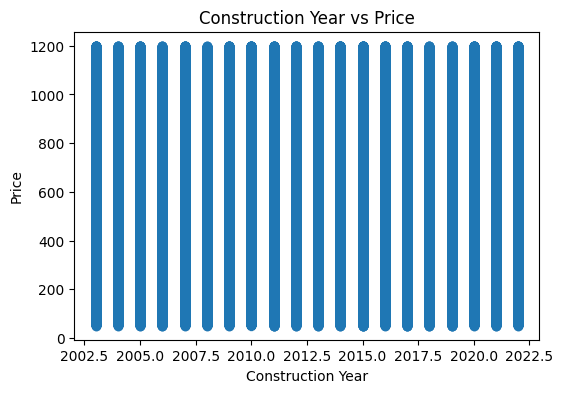

📈 Correlation between Construction Year and Price: -0.004


In [11]:
import matplotlib.pyplot as plt

if 'Construction year' in df.columns and 'price' in df.columns:
    plt.figure(figsize=(6,4))
    plt.scatter(df['Construction year'], df['price'], alpha=0.5)
    plt.title('Construction Year vs Price')
    plt.xlabel('Construction Year')
    plt.ylabel('Price')
    plt.show()

    corr = df['Construction year'].corr(df['price'])
    print("📈 Correlation between Construction Year and Price:", round(corr, 3))
else:
    print("No Construction Year column found.")


In [12]:
# Check if the main column exists
if 'calculated host listings count' in df.columns:
    # Try to find a host column
    possible_hosts = [c for c in df.columns if 'host' in c.lower()]
    if possible_hosts:
        host_col = possible_hosts[0]
        print("🔍 Using host column:", host_col)
        top_hosts = df.groupby(host_col)['calculated host listings count'].max().sort_values(ascending=False).head(10)
        print("\n🏆 Top 10 Hosts by Listings Count:\n", top_hosts)
    else:
        print("⚠️ No explicit host column found. Showing top listing counts only:")
        print(df['calculated host listings count'].sort_values(ascending=False).head(10))
else:
    print("❌ Column 'calculated host listings count' not found in dataset.")


🔍 Using host column: host id

🏆 Top 10 Hosts by Listings Count:
 host id
6866703084     332.0
45153317531    332.0
3231719861     332.0
72619494405    332.0
62221516723    332.0
80832323346    332.0
83842788941    332.0
28199312869    332.0
53394556356    332.0
83412943157    332.0
Name: calculated host listings count, dtype: float64


In [13]:
# Check for verification or identity column
verify_cols = [c for c in df.columns if 'verify' in c.lower() or 'identity' in c.lower()]
review_cols = [c for c in df.columns if 'review' in c.lower()]

if verify_cols and review_cols:
    verify_col = verify_cols[0]
    review_col = review_cols[0]

    print(f"✅ Using verification column: {verify_col}")
    print(f"✅ Using review column: {review_col}\n")

    avg_reviews = df.groupby(verify_col)[review_col].mean().sort_values(ascending=False)
    print("⭐ Average Reviews by Verification Status:\n", avg_reviews)
else:
    print("⚠️ Could not find both verification and review columns in the dataset.")
    print("Available columns:\n", df.columns.tolist())


✅ Using verification column: host_identity_verified
✅ Using review column: number of reviews

⭐ Average Reviews by Verification Status:
 host_identity_verified
unconfirmed    27.577715
verified       27.351213
Name: number of reviews, dtype: float64


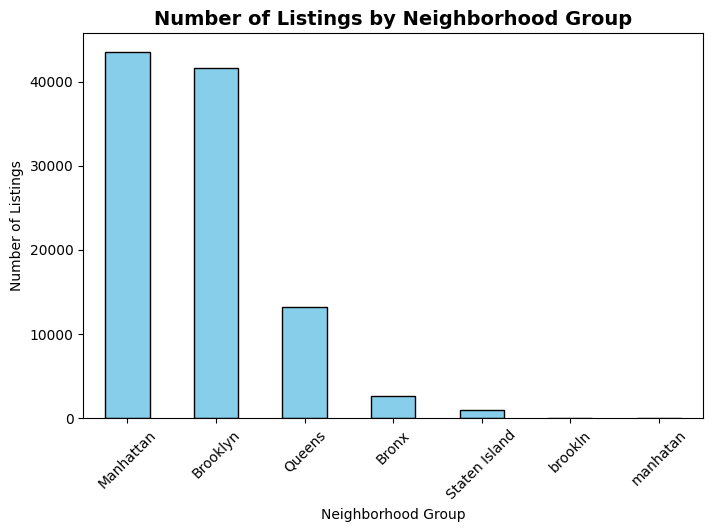

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df['neighbourhood group'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Listings by Neighborhood Group', fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood Group')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.show()


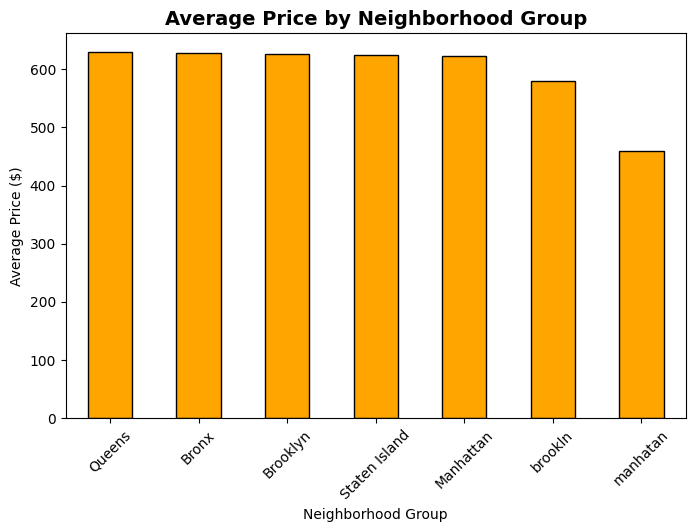

In [15]:
plt.figure(figsize=(8,5))
df.groupby('neighbourhood group')['price'].mean().sort_values(ascending=False).plot(kind='bar', color='orange', edgecolor='black')
plt.title('Average Price by Neighborhood Group', fontsize=14, fontweight='bold')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.show()


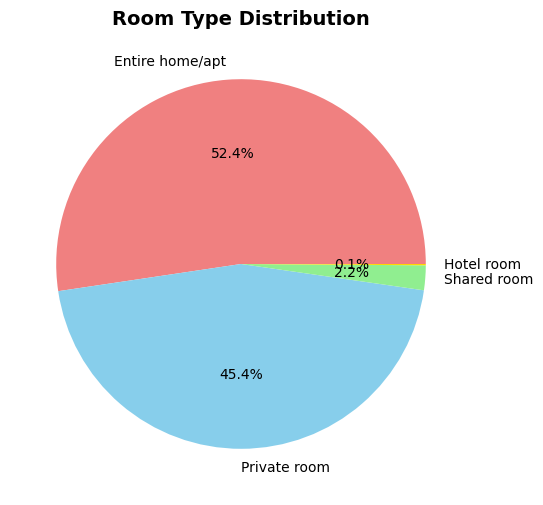

In [16]:
plt.figure(figsize=(6,6))
df['room type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'skyblue', 'lightgreen', 'gold'])
plt.title('Room Type Distribution', fontsize=14, fontweight='bold')
plt.ylabel('')
plt.show()
